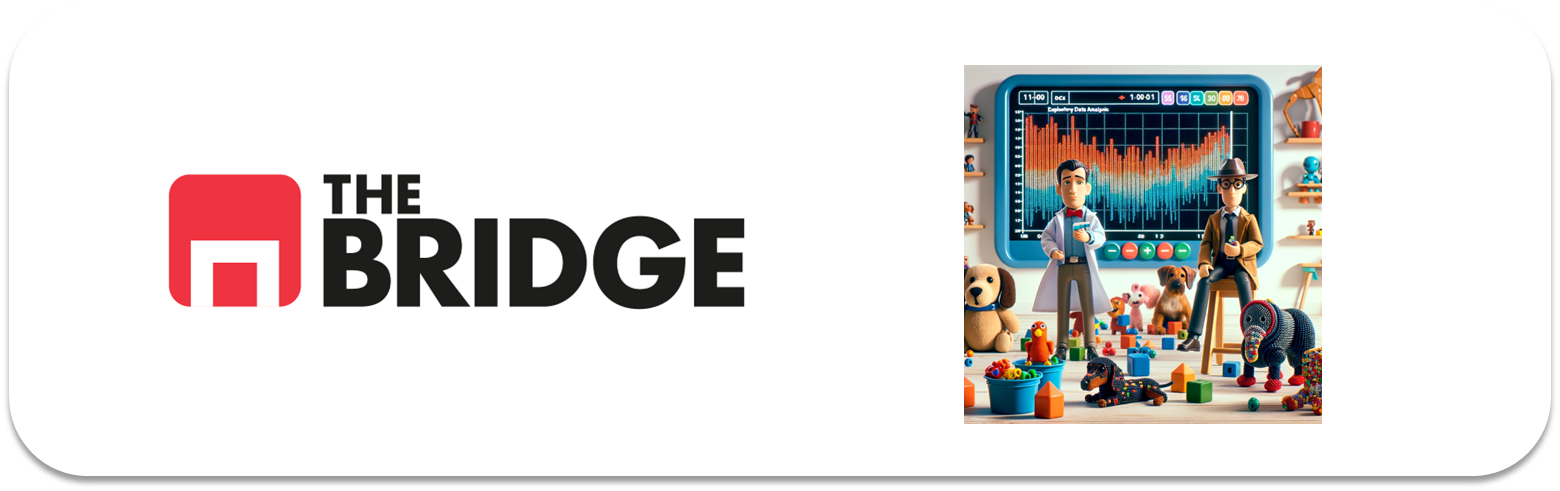

## Análisis de Datos (Multivariante): Cuando hay una categórica

A partir del análisis 2 a 2 de variables, el análisis tiende a complicarse o más bien a hacerse un poco difícil de manejar, en general. El número de combinaciones se dispara (a poco que tengas unas cuantas variables) y ya el consejo de probar todas las posibles se hace imposible de sostener. 

Por eso lo primero es lo primero:

0. Revisa las conclusiones y resultados de los análisis anteriores junto con tus preguntas (si las tuvieras) del principio: Cierra el conjunto de preguntas que no hayas contestado y quieras contestar.
1. Si puedes contestar alguna de esas preguntas atacando tus dataframes con analisis adhoc (es decir propios de tus datos y que a ti se te ocurran), contéstalas.
1. Si todavía necesitas ver más de dos vairables juntas, hazte una planificación: Decide que grupos de variables necesitas ver en conjunto de las preguntas cerradas en 0.
2. Y ahora sí: Si hay una de esas variables que es categórica vale lo que te voy a contar. (eso y quieres ver tres variables en conjunto)

Y como en todo el sprint, arranquemos con todo lo necesario:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Tres variables: una categórica

Lo que sigue aplica a tres variables, si tienes más lo que tienes que hacer es generalizar el proceso (siempre que tengas al menos tantas variables categóricas como el total menos dos, si tienes 3 una, si quieres ver 4, dos y así).

Cuando tengas tres variables y una sea categórica lo que vamos a hacer es construir un análisis bivariante para cada una de las categorías de la vairable categórica [Jaime tengo dos variables categóricas, ¿Qué hago? y yo tengo las tres... Entonces utiliza la variable categórica más importante según tu criterio como la variable que dirige es decir aquella para cada uno de sus valores vamos a hacer un análisis bivariante de las otras dos]. Veámoslo con dos ejemplos

### Caso 1. Seguros: Análisis response-renew_offer_type-education

Escojo esta combinación porque habíamos visto que había una variación significativa de las respuestas según la oferta y ahora quiero ver como se relaciona eso con el nivel de estudios


**#0 pinto todos los valores** iniciales

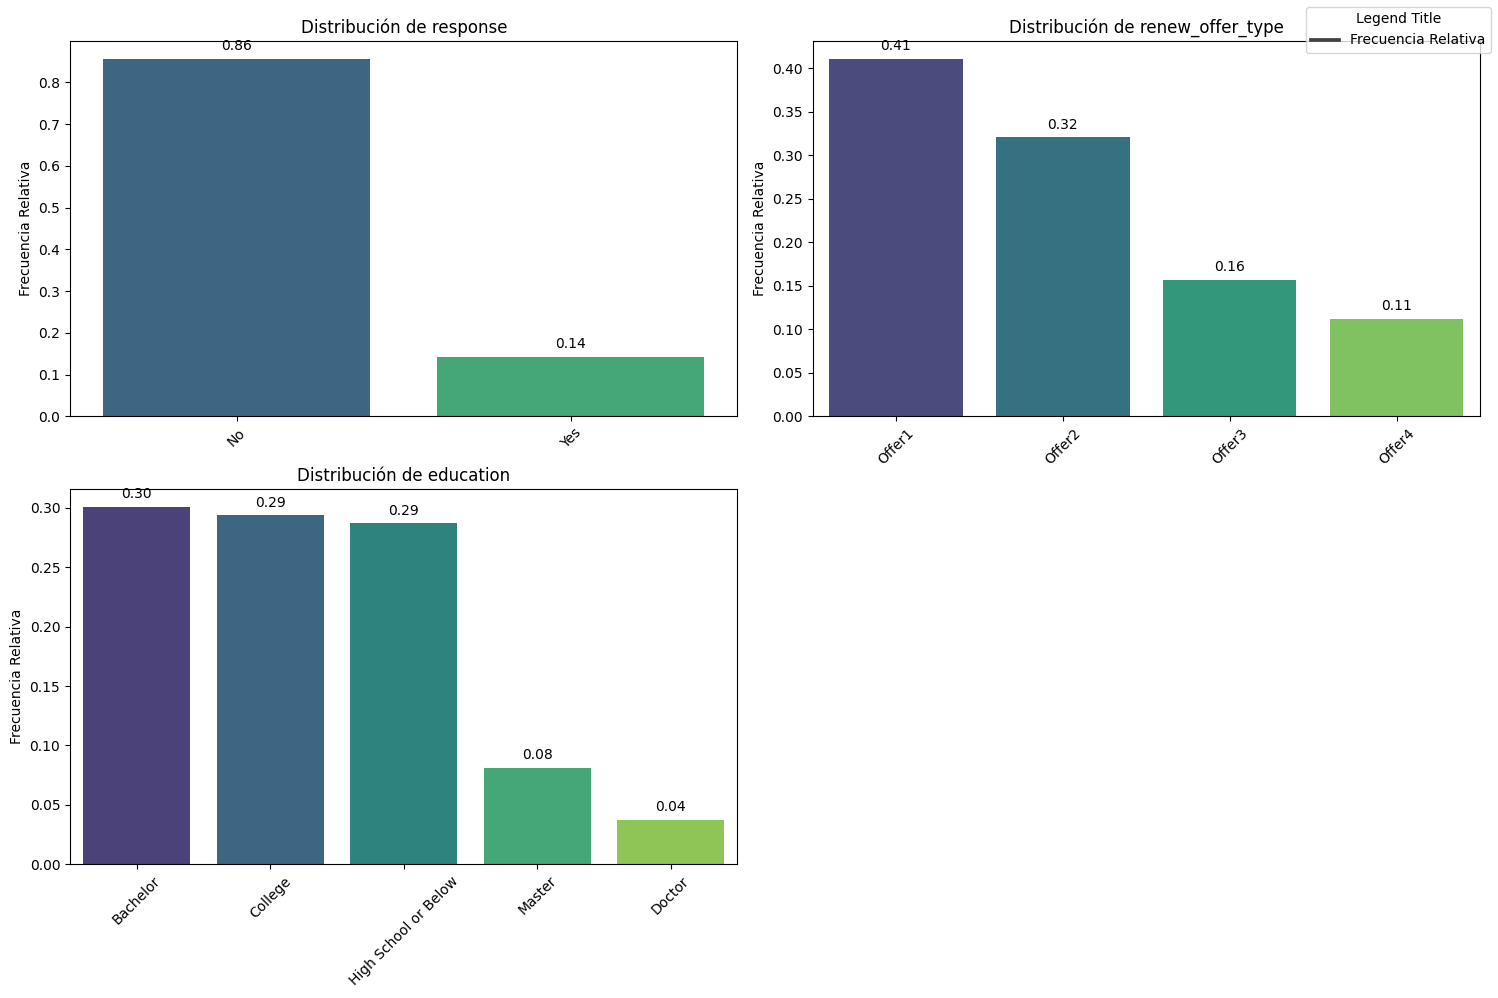

In [2]:
pinta_distribucion_categoricas(df_seguros,["response","renew_offer_type","education"], relativa= True, mostrar_valores= True)

**#1 Escojo variable directora** ya que tengo 3 categóricas y priorizo el resto

En este caso lo tengo claro, `response` es targe, así que esa manda. Luego la siguiente que me interese, que era `renew_offer_type` y finalmente eduaction


¿Por qué este orden? Porque en el bivariante vimos que la oferta tenía impacto en la respuesta. ¿Podría haber hecho un estudio bivariante de education con offer_type? Deberías haberlo hecho pero eso no garantiza el análisis con "response"

**#2 Muestro el bivariante de cada una con las otras dos**

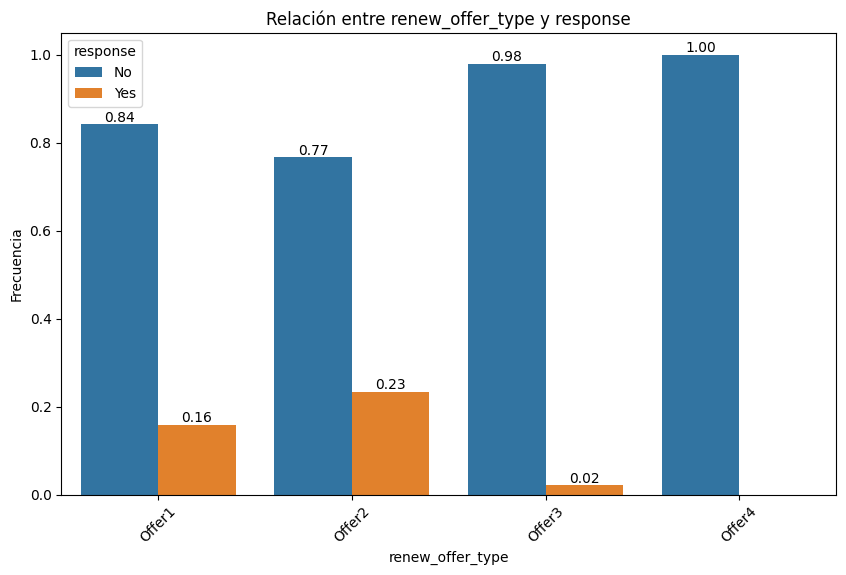

In [3]:
plot_categorical_relationship_fin(df_seguros,"renew_offer_type","response", relative_freq= True, show_values= True)

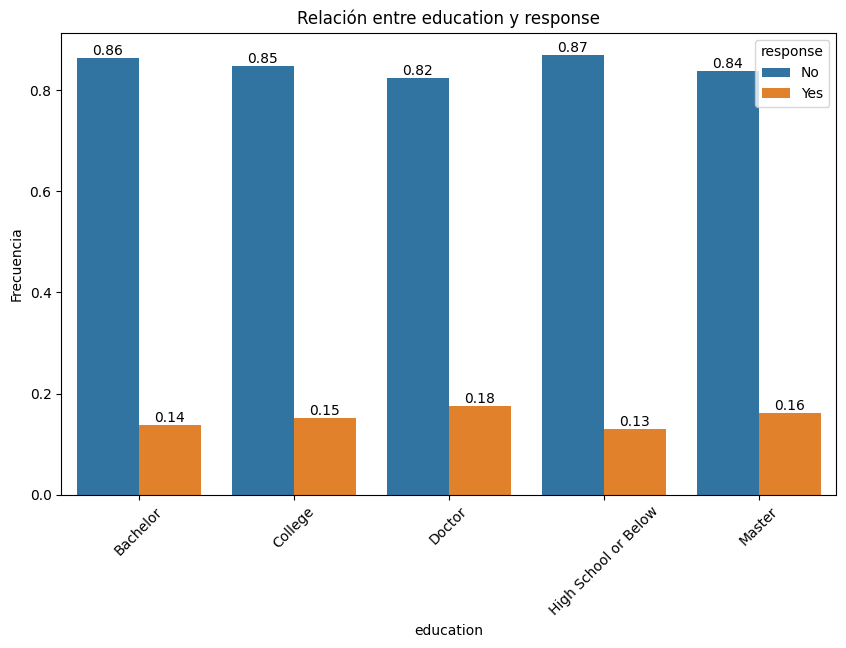

In [4]:
plot_categorical_relationship_fin(df_seguros,"education","response", relative_freq= True, show_values= True)

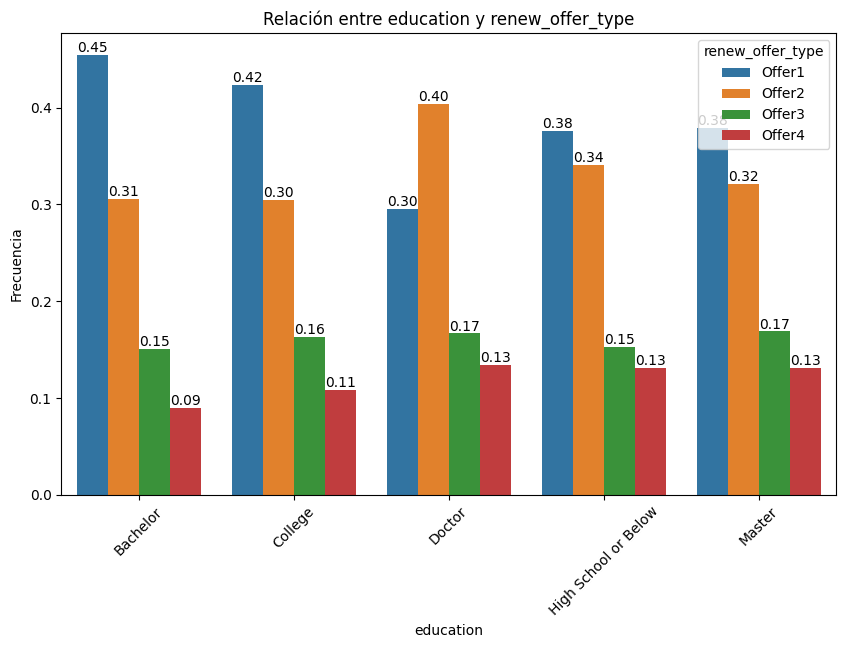

In [5]:
plot_categorical_relationship_fin(df_seguros,"education","renew_offer_type", relative_freq= True, show_values= True)

Ya podemos ir viendo algo, fijate que doctor tiene mejor ratio de respuesta, pero entre otras cosas le ofrecieron más la oferta_2

**#3 Divido mi dataset en tantos subdatasets (dataframes) como valores de mi categórica directora** y me quedo solo con las columnas de las otras dos variables

In [7]:
columnas = ["response","renew_offer_type","education"] 
col_directora = "response"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_seguros[col_directora].unique():# aaqui recorre la columna directora creando un diccionario donde me voy hacer un subdataframe de seguros con esas 2 condiciones
    diccionario_multivariante[valor] = df_seguros.loc[df_seguros[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion
    # todo con la finalidad recorrer ese diccionario y para ese frame de la columna respuesta si o no, me hago el analisis bivariante de las 2 variables que he dejado fuera

**#4 Hago un análsis bivariante** para cada subdataset y comparo todo

Respuesta No:


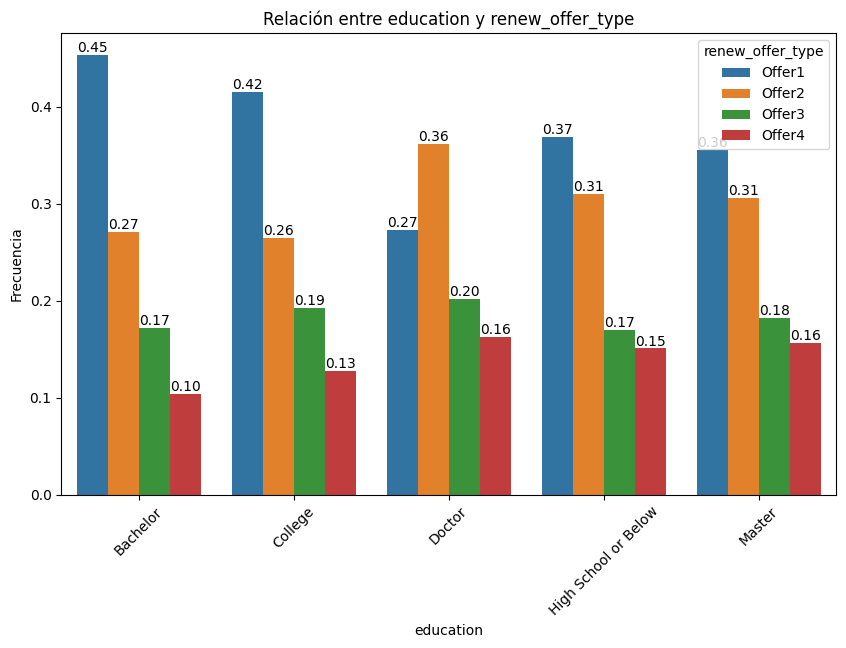

Respuesta Yes:


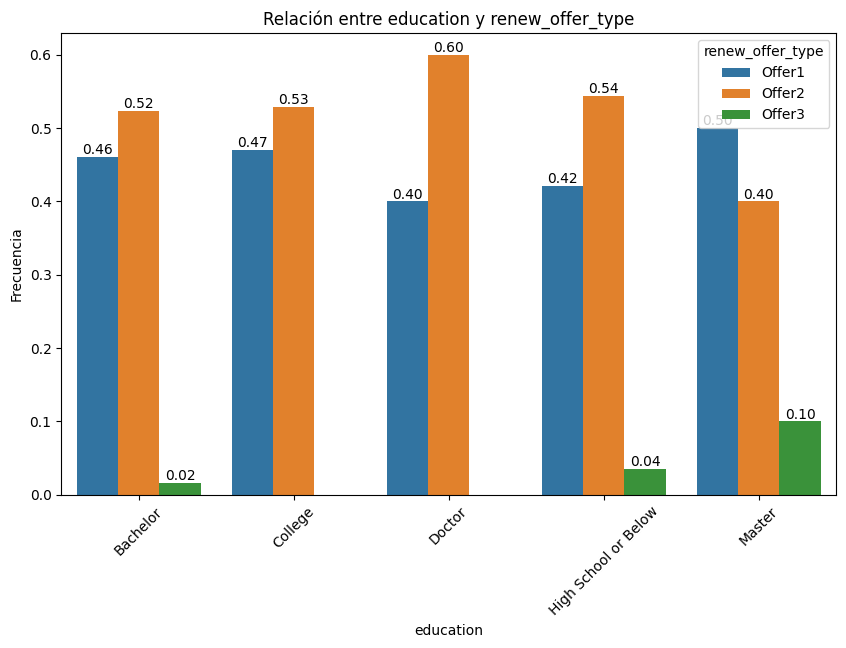

In [8]:
# voy iterando por el diccionario multivariante, voy cargando en valor en si ono , y despuues hago un plot para hacer el nibariante de 2 categoricas-
for valor,df_datos in diccionario_multivariante.items():
    #mostrando su valor
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

Y el análisis lo mezcla todo:
* De las bivariante sabemos que la oferta influye en la respuesta y también que no contestaron exactamente igual los doctores que el resto (tienen una tasa ligeramente superior de respuesta). Podría pensar que los doctores (o master) responden mejor.
* De observar la bivariante entre oferta y educación deberíamos sospechar que no tiene que ver con eso sino con el hecho de que los doctores recibieron más ofertas de tipo 2.
* El análisis a tres bandas, muestra varias cosas por un lado para todos los grupos de educación fue superior la respuesta a la oferta 2, salvo para Master y eso habría que analizarlo mejor (ya sabes algo que destaca), pero para los doctores también fue aparentemente mejor. Además en Master es donde funciona la oferta3. Estos resultados son bastante interesantes (pero poniendolos en el contexto de que tanto Doctores como Masters son los segmento más pequeños con diferencia). 
* En definitiva la oferta 2 es claramente superior, aparentemente es más efectiva en Doctores y menos efectiva en Master donde además la oferta 3 es más efectiva.

### Caso 2. Viajes. Análisis Aircompany-ingresos-consumo_kg

Aquí solo tengo una categórica, así que lo que haré será usarla para dividir el análisis en cinco (uno por cada compañía) bivariantes de dos numéricas (miraremos su scartter plot y su correlación)


**#3** Como ya tengo la directora, ya **hago la división en dataframes**

Nota Importante: Sí, debería mostrar los analisis univariantes antes y los bivariantes dos a dos... pero por tiempo te lo dejo como ejercicio

In [9]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

**#4 Hago un análsis bivariante** para cada subdataset y comparo todo

Respuesta Airnar:


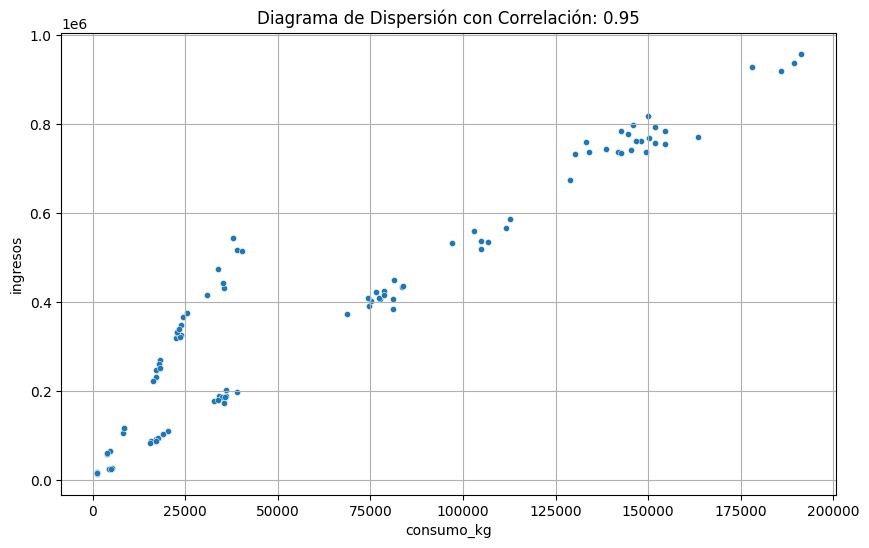

Respuesta FlyQ:


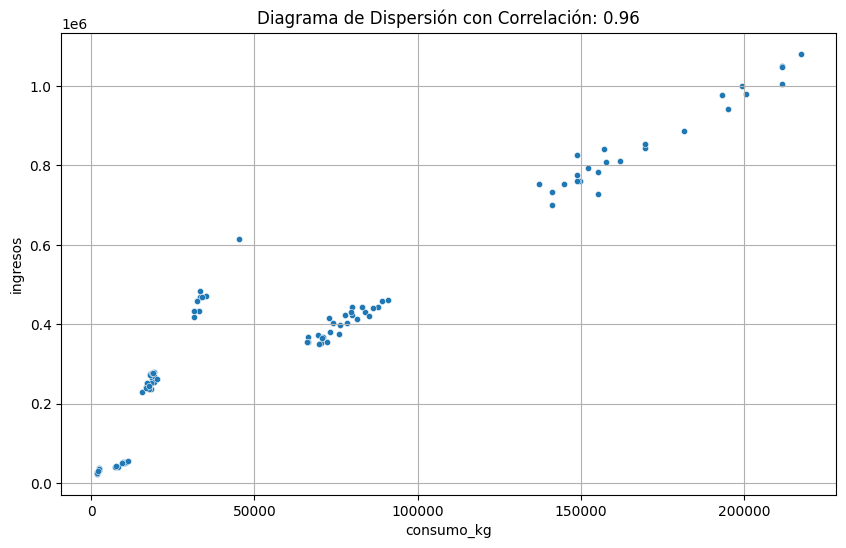

Respuesta TabarAir:


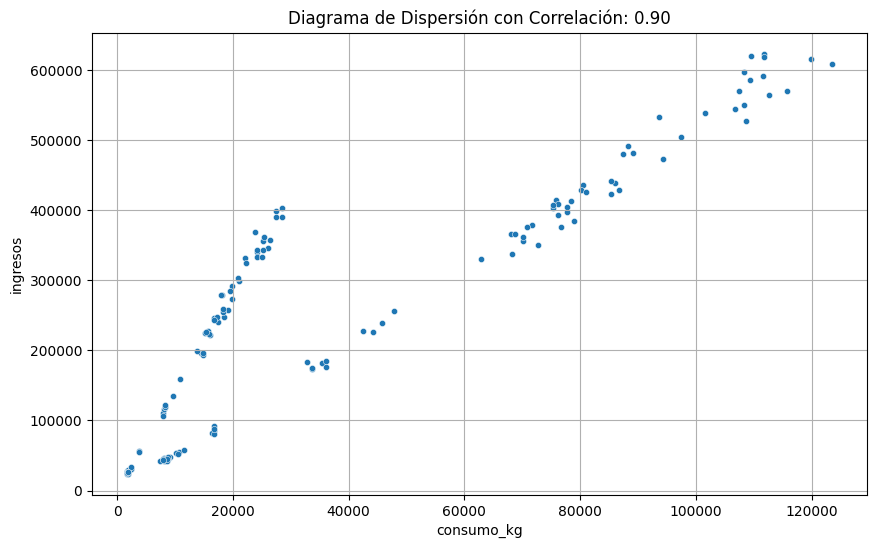

Respuesta MoldaviAir:


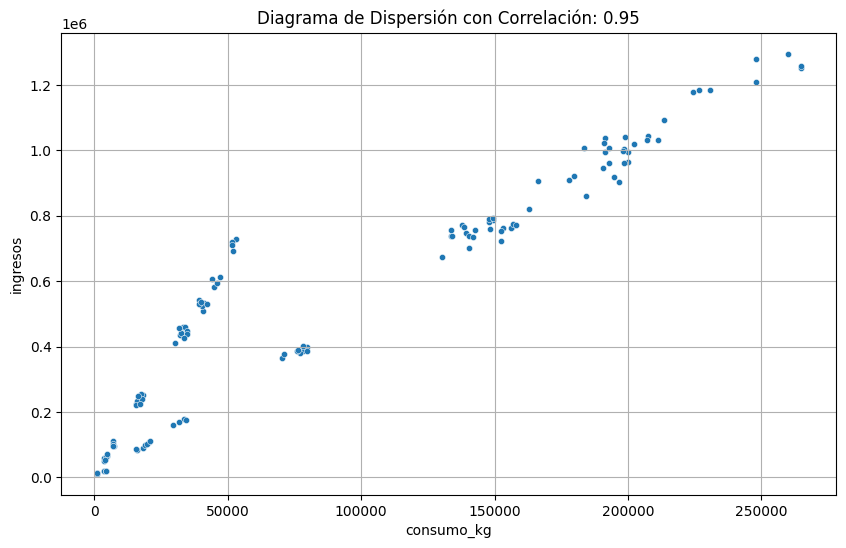

Respuesta PamPangea:


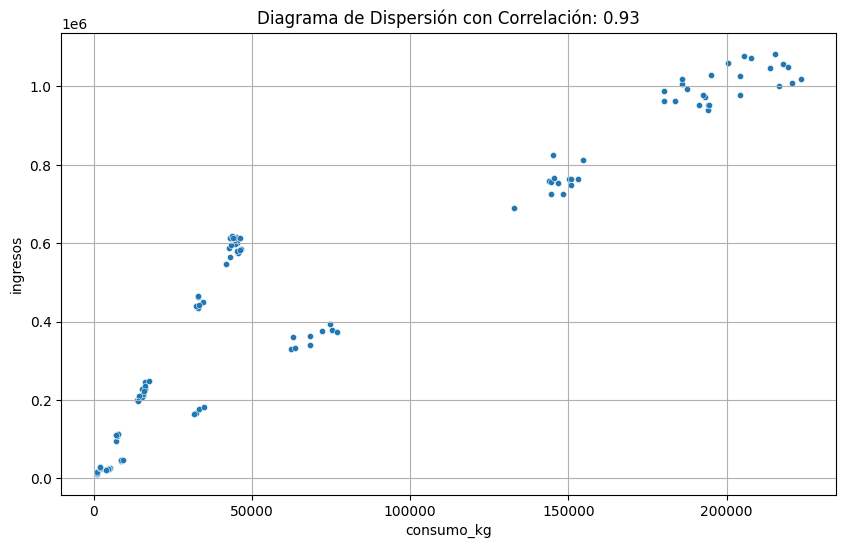

In [10]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

* En todas las compañisa hay una (esperada) correlación ente ingresos y consumos, pero el hecho de que haya realmente dos rectas nos habla de que los vuelos cortos son más eficientes que los largos (ojo para estos datos, no te lances a extrapolar para el mundo real).plot_categorical_relationship_fin
* Respecto a las compañías entre sí el gráfico invita a generar otro en el que pueda comparar las pendientes de esas marcadas relaciones lineales. Quien tenga las pendientes de las rectas mayores será la empresa más eficiente.

In [38]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}

for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor, [col_2, col_1]]

# Imprimir el contenido del diccionario antes de llamar a la función
#print(diccionario_multivariante)


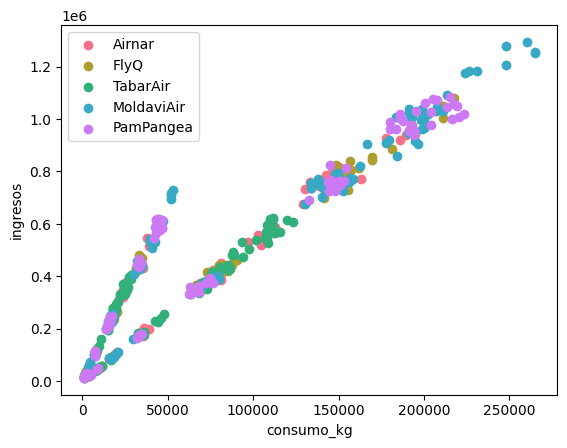

In [41]:
#graficos dipersion combinados

def graficos_dispersion_combinados(diccionario_multivariante, columnas, colores=None):
    fig, ax = plt.subplots()
    
    if colores is None:
        colores = sns.color_palette('husl', len(diccionario_multivariante))

    for (key, df), color in zip(diccionario_multivariante.items(), colores):
        ax.scatter(df[columnas[0]], df[columnas[1]], label=str(key), color=color)

    ax.set_xlabel(columnas[0])
    ax.set_ylabel(columnas[1])
    ax.legend()
    plt.show()

    # Uso de la función con tu diccionario
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}

for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor, [col_2, col_1]]

graficos_dispersion_combinados(diccionario_multivariante, columnas=[col_2, col_1])